# HOG 알고리즘과 보행자 검출
---


그래디언트 방향 히스토그램을 의미  

히스토그램은 총 256개의 값이 나온다.  

영상 크기에 관계없이 256개의 특징을 구할 수 있는 특징  

엣지의 양을 보는 것이 아닌 엣지의 방향을 봄.  

서포트 벡터 머신을 사용하여 입력 영상에서 보행자 위치를 검출하는 방법  



하라이크와 검출방법은 동일함.  

- 기본적으로 64 x 128 크기의 영상에서 계산함
- 먼저 입력 영상으로부터 그래디언트를 계산 (소벨연산)
- 그래디언트는 방향 성분으로 계산하며, 방향성분은 0도부터 180도까지로 설정
- 전체영상을 8x8 픽셀로 나누어 가로 8개 세로 16개로 생성
- 각각의 셀로부터 그래디언트 방향 성분에 대한 히스토그램을 구함
    히스토그램의 장점으로 
- 방향 성분을 20도 단위로 구분하여 총 아홉개의 빈으로 구성된 방향 히스토그램이 만들어짐.
- 하나의 블록에는 네 개의 셀이 있고 각 셀에는 아홉개의 빈으로 히스토그램 저ㅇ보가 있음.
- 3780 개의 실수 값이 64X128 영상을 표현하는 HOG 특징 벡터 역할을 함


In [3]:
import sys
import cv2
import numpy as np
import random
import pytesseract
from IPython.core.display import HTML
import requests

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

- 두 특징 벡터를 구분하기 위해 SVM 알고리즘을 사용  
= SVM 알고리즘은 마진이 최대가 되는 초평면을 만듬

In [6]:
cap = cv2.VideoCapture('vision/vtest.avi')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

while True:
    ret, frame = cap.read()

    if not ret: break

    detected, _ = hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)

    cv2.imshow('frame', frame)
    if cv2.waitKey(10) == 27:  break

cv2.destroyAllWindows()


In [5]:
cap = cv2.VideoCapture('vision/vtest.avi')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100)


while True:
    ret, frame = cap.read()
    if not ret: break
        
    fgmask = fgbg.apply(frame)        
    detected, _ = hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)        
    cv2.imshow('mask', fgmask)
    cv2.imshow('frame', frame)
        
    if cv2.waitKey(-1) == 27:  break

cv2.destroyAllWindows()

# 지역 특징점 검출과 매칭
---

모라벡 알고리즘  
노이즈에 취약함.  
한픽셀 옆에밖에(int 베이스) 할 수 없음  

해리스 코너  
u와 v가 실수 값 ( 일반화 시켰다. )
앞에 가우시안 블러링을 한다.  노이즈때문에 엣지값이 나올 수 있기 때문에   


코너점이 여러개 몰리는 문제 발생.  
주변 값보다 큰 값을 가지는 것을 대표점으로 선택한다.  
=> 최대비 억제  

스케일에 불변인가?
-> 스케일이 변해도 같은 지점에서 관심점이 검출되나  
스케일 변화에는 취약하다. 

# FAST 코너 검출 방법
---


In [19]:
src = cv2.imread('vision/building.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(60) 
# fast = cv2.FastFeatureDetector_create(120) # 강한 코너점만 찾는다는 것 

keypoints = fast.detect(src)

print(len(keypoints)) # 코너점 580개 검출
print(keypoints[0]) # 객체임

580
<KeyPoint 0000017BFD893630>


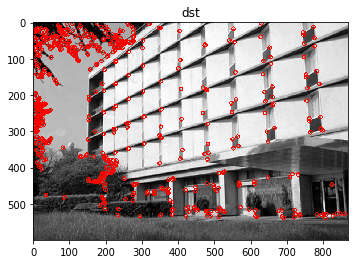

In [20]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1])) # 포인트 x, y위치 검출
    cv2.circle(dst, pt, 5, (0, 0, 255), 2)
    
imshow("dst", dst)

보면 해리스 코너와 결과가 비슷하다.  


87
<KeyPoint 0000017BFD8B5810>


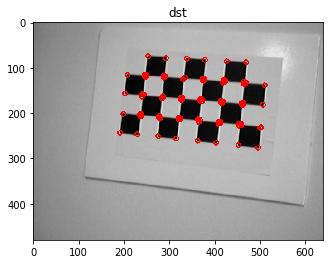

In [24]:
src = cv2.imread('vision/chessBoard.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(60) 
# fast = cv2.FastFeatureDetector_create(120) # 강한 코너점만 찾는다는 것 

keypoints = fast.detect(src)

print(len(keypoints)) # 코너점 580개 검출
print(keypoints[0]) # 객체임
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1])) # 포인트 x, y위치 검출
    cv2.circle(dst, pt, 5, (0, 0, 255), 2)
    
imshow("dst", dst)

94
<KeyPoint 0000017BFCE9FFC0>


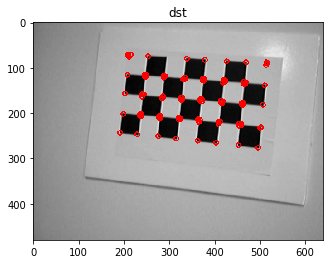

In [22]:
src = cv2.imread('vision/chessBoard2.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(60) 
# fast = cv2.FastFeatureDetector_create(120) # 강한 코너점만 찾는다는 것 

keypoints = fast.detect(src)

print(len(keypoints)) # 코너점 580개 검출
print(keypoints[0]) # 객체임
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1])) # 포인트 x, y위치 검출
    cv2.circle(dst, pt, 5, (0, 0, 255), 2)
    
imshow("dst", dst)

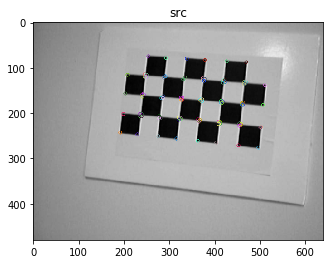

True

In [26]:
# 뭉친 코너점들을 잘 표현해주는 함수
dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
imshow('src', dst)
cv2.imwrite("out.png", dst)

# SIFT
---

# ORB
---


len(keypoints): 500
desc.shape: (500, 32)


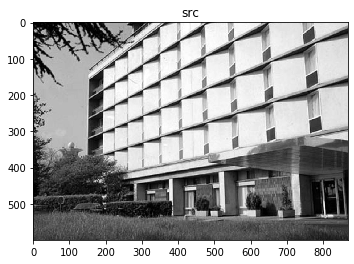

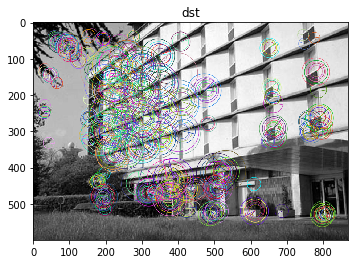

In [28]:
src = cv2.imread('vision/building.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

orb = cv2.ORB_create()

keypoints = orb.detect(src)
keypoints, desc = orb.compute(src, keypoints)

print('len(keypoints):', len(keypoints))
print('desc.shape:', desc.shape)

dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()


동그라미 + 화살표도 있다.  

이 keypoint들은 나중에 회전시켜도 동일한 점을 찾을 수 있다. 

desc.shape: (500, 32)  
한 점이 32개의 정보를 가지고 있는 것을 볼 수 있다.  



In [35]:
print(keypoints[0].pt[0], keypoints[0].pt[1])
print(src[int(keypoints[0].pt[1]), int(keypoints[0].pt[0])])
print(desc[0, :])

664.0 291.0
75
[ 17 205 111 254  28 134  79 244 196  64 222 198 113 231 176  97 124 226
  63 238 233 139  62 189 242 239 170 136  61 186 112 120]


밝기가 75인 것을 가지고는 다른 영상에서는 구별할 수 없지만
아래의 32개의 데이터로 변환하여 기하학적 변환이 된 영상에서 구별할 수 있게 한다.  

그래서 한점을 나타내기 위해 약 32byte를 쓴다.

In [30]:
print(desc[1, :])

[222  59 122 102 115  90  63 112  41 236 183 171 111  95 151  48  54 245
 221 227 220 147 164 238 114 205  41 179 103 183  15  87]


In [36]:
print(desc.shape) # 256 / 8

(500, 32)


매칭 방법

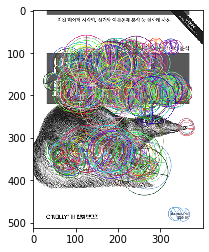

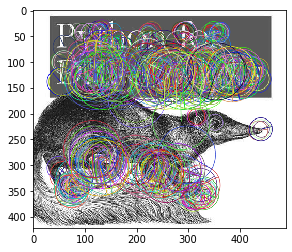

In [39]:
src1 = cv2.imread('vision/book1.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('vision/book1test.jpg', cv2.IMREAD_GRAYSCALE)

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("", dst1)
imshow("", dst2)

cv2.imshow('src', dst1)
cv2.imshow('dst', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [40]:
desc1[0]

array([175, 254, 240,  83, 228,  60, 255, 182, 121, 207, 124, 190, 107,
       109, 223, 189,  55, 219, 149, 138, 241, 252, 172, 234, 111, 223,
       116, 162, 231, 245, 198, 253], dtype=uint8)

In [41]:
keypoints1[0].pt

(325.0, 90.0)

In [42]:
desc2[0]

array([ 44,  35, 148, 100, 173,  13,  86,  88, 131, 188, 176,  73, 135,
       233,  65, 154, 200, 224, 196,  82,  12,  99, 202, 136, 139, 209,
         5,  59, 194, 127,  90,  10], dtype=uint8)

In [48]:
print(np.mean((desc1[0] - desc2[0]) ** 2))
print(np.mean((desc1[0] - desc2[1]) ** 2))
print(np.mean((desc1[0] - desc2[3]) ** 2))

d = []
for i in range(len(keypoints2)):
    d.append(np.mean((desc1[0] - desc2[i]) ** 2))    


105.1875
105.65625
96.34375


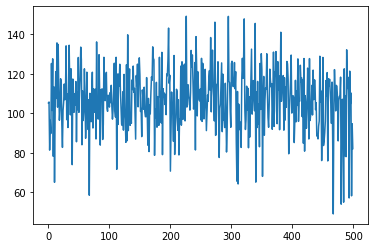

In [50]:
plt.plot(d)

y축이 가장 작은 점과 같을 확률이 제일 높다.

In [51]:
np.argmin(d) # 가장 작은 점의 인덱스

467

In [53]:
print(keypoints2[467].pt)

(253.8087158203125, 137.3553009033203)


 해밍 디스턴스는 비트차이를 본다?  
 0001110011  
 1000000000   
 비트가 다른지 같은지만 본다. 값을 보는 것이 아님!  
 고속으로 거리를 계산할 수 있다.  
 
 심하게 보면  
 0000000000  
 1000000000
 -> 1차이임  
 
 즉 밝기 변화가 맞는지만 보는 것 유클리안 디스턴스 말고
 
 


In [54]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

In [55]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, matches, None)

In [60]:
# 소팅을 해서 상위 50개만 뽑았음
matches = sorted(matches, key = lambda x: x.distance)
good_matches = matches[:50]
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

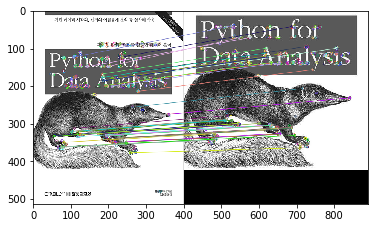

In [61]:
imshow("", dst)
cv2.imshow("", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [62]:
m = good_matches[0]
print(m.queryIdx, m.trainIdx, m.distance)

359 420 6.0


# 객체 인식
---

평균값을 찾아 작은 것들을 매칭하여 객체를 인식하자

In [105]:
sift = cv2.ORB_create()
bf = cv2.BFMatcher()

images = ['vision/book1.jpg', 'vision/book2.jpg', 'vision/book3.jpg', 'vision/book4.jpg'] 
test = "vision/book2test2.png"

img = cv2.imread(test)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kp, dest = sift.detectAndCompute(gray, None)
score = []
for i in range(0, len(images)) :
    img2 = cv2.imread(images[i])
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    kp2, dest2 = sift.detectAndCompute(gray2, None)
    matches = bf.match(dest,dest2)
    matches = sorted(matches, key = lambda x:x.distance)
    matches = matches[:50]
    distance = np.mean([x.distance for x in matches])
    score.append(distance)
print(score)

[302.8883367919922, 319.36297424316405, 311.3799703979492, 323.6208752441406]


(<matplotlib.axes._subplots.AxesSubplot at 0x17b81327748>,
 <matplotlib.image.AxesImage at 0x17b813a2148>)

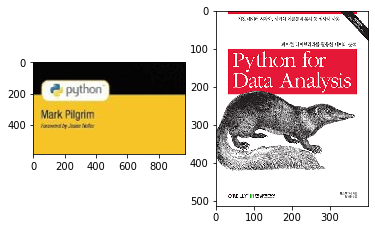

In [106]:
decision = np.argmin(score)
img2 = cv2.imread(images[decision])
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [87]:
matches[:50].distance

AttributeError: 'list' object has no attribute 'distance'

In [107]:
src1 = cv2.imread('vision/sample.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('vision/scene01.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

In [116]:
desc2.shape

(500, 32)

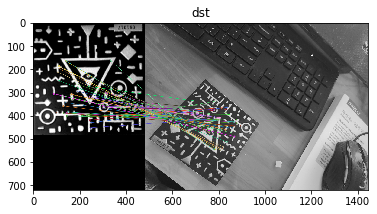

In [118]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50] 

dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

imshow('dst', dst) 

In [123]:
# print(np.array([keypoints1[m.queryIdx].pt for m in good_matches]))

pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

print(pts1)

[[[215.65443  230.16963 ]]

 [[240.53763  271.64163 ]]

 [[114.66182  189.90865 ]]

 [[236.49     225.74046 ]]

 [[141.12001  164.16    ]]

 [[164.22916  306.06345 ]]

 [[110.880005 184.32    ]]

 [[ 89.85601  304.12802 ]]

 [[242.61124  323.48166 ]]

 [[144.3226   164.22916 ]]

 [[111.97443  248.83206 ]]

 [[357.69604  330.04803 ]]

 [[179.15909  259.78067 ]]

 [[313.5284   301.58447 ]]

 [[211.50725  400.61963 ]]

 [[243.85542  323.4817  ]]

 [[191.10303  280.68256 ]]

 [[233.28001  397.44    ]]

 [[243.65637  318.9032  ]]

 [[129.6      357.69604 ]]

 [[135.36     341.28    ]]

 [[145.44     387.36002 ]]

 [[131.04001  387.36002 ]]

 [[105.40801  210.81602 ]]

 [[313.52838  323.4817  ]]

 [[191.10303  292.62653 ]]

 [[ 89.28001  305.28    ]]

 [[126.14401  312.76804 ]]

 [[245.37602  418.17603 ]]

 [[167.21515  328.4583  ]]

 [[334.4303   385.19205 ]]

 [[243.65637  340.40228 ]]

 [[110.880005 195.84001 ]]

 [[145.15201  400.89603 ]]

 [[145.15202  400.20486 ]]

 [[238.87878  226.93

In [109]:
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)
print(H)

[[-6.32286424e-01  5.85445872e-01  3.03567203e+02]
 [-5.48470406e-01 -3.61298891e-01  7.03107040e+02]
 [-2.16475409e-04  4.24247210e-04  1.00000000e+00]]


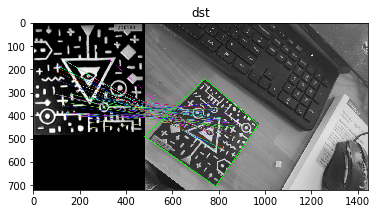

In [110]:
h, w = src1.shape

corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
corners2 = cv2.perspectiveTransform(corners1, H)
corners2 = corners2 + np.float32([w, 0])

cv2.polylines(dst, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)

imshow('dst', dst)  